In [1]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp39-cp39-macosx_11_0_arm64.whl size=152836 sha256=5df74109914815990c39fec7248d62727a5bdc580d3f2894441a7d0d195b88b5
  Stored in directory: /Users/kwonsoonhyong/Library/Caches/pip/wheels/80/53/9d/ac9f8de67897f4804f21caa5a42ed7afb86669f17a0b241bc1
Successfully built wordcloud


In [3]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 12.8 MB/s eta 0:00:00


In [4]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/kwonsoonhyong/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/kwonsoonhyong/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/kwonsoonhyong/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/kwonsoonhyong/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/kwonsoonhyong/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |  

True

In [5]:
# Text를 불러서 words 분류
content = open('../Data/Independence.txt').read()
content

'When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature\'s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness. (Note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of Happiness" but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today). \nThat to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed. That whenever

In [6]:
# 불필요한 심벌 없애기 : 정규화 이용
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content)
cleaned_content

'When in the Course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the Laws of Nature and of Natures God entitle them a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be selfevident that all men are created equal that they are endowed by their Creator with certain unalienable Rights that among these are Life Liberty and the pursuit of Happiness. Note the original handwritten text ended on the phrasethe pursuit of property rather than the pursuit of Happiness but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today. \nThat to secure these rights Governments are instituted among Men deriving their just powers from the consent of the governed. That whenever any Form of Governme

In [7]:
# 대문자를 소문자로 변환
cleaned_content=cleaned_content.lower()
cleaned_content

'when in the course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the laws of nature and of natures god entitle them a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nwe hold these truths to be selfevident that all men are created equal that they are endowed by their creator with certain unalienable rights that among these are life liberty and the pursuit of happiness. note the original handwritten text ended on the phrasethe pursuit of property rather than the pursuit of happiness but the phrase was changed in subsequent copies in part because it was broader. the latter phrase is used today. \nthat to secure these rights governments are instituted among men deriving their just powers from the consent of the governed. that whenever any form of governme

In [8]:
# 각각의 워드를 토큰으로 쪼갠다.
word_tokens=nltk.word_tokenize(cleaned_content)

['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary', 'for', 'one', 'people', 'to', 'dissolve', 'the', 'political', 'bands', 'which', 'have', 'connected', 'them', 'with', 'another', 'and', 'to', 'assume', 'among', 'the', 'powers', 'of', 'the', 'earth', 'the', 'separate', 'and', 'equal', 'station', 'to', 'which', 'the', 'laws', 'of', 'nature', 'and', 'of', 'natures', 'god', 'entitle', 'them', 'a', 'decent', 'respect', 'to', 'the', 'opinions', 'of', 'mankind', 'requires', 'that', 'they', 'should', 'declare', 'the', 'causes', 'which', 'impel', 'them', 'to', 'the', 'separation', '.', 'we', 'hold', 'these', 'truths', 'to', 'be', 'selfevident', 'that', 'all', 'men', 'are', 'created', 'equal', 'that', 'they', 'are', 'endowed', 'by', 'their', 'creator', 'with', 'certain', 'unalienable', 'rights', 'that', 'among', 'these', 'are', 'life', 'liberty', 'and', 'the', 'pursuit', 'of', 'happiness', '.', 'note', 'the', 'original', 'handwritten', 'text', 'ended', 'on', '

In [9]:
# 품사분리
# 명사만 사용하기에 품사분리를 해야 된다. 
tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[('when', 'WRB'), ('in', 'IN'), ('the', 'DT'), ('course', 'NN'), ('of', 'IN'), ('human', 'JJ'), ('events', 'NNS'), ('it', 'PRP'), ('becomes', 'VBZ'), ('necessary', 'JJ'), ('for', 'IN'), ('one', 'CD'), ('people', 'NNS'), ('to', 'TO'), ('dissolve', 'VB'), ('the', 'DT'), ('political', 'JJ'), ('bands', 'NNS'), ('which', 'WDT'), ('have', 'VBP'), ('connected', 'VBN'), ('them', 'PRP'), ('with', 'IN'), ('another', 'DT'), ('and', 'CC'), ('to', 'TO'), ('assume', 'VB'), ('among', 'IN'), ('the', 'DT'), ('powers', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('earth', 'NN'), ('the', 'DT'), ('separate', 'JJ'), ('and', 'CC'), ('equal', 'JJ'), ('station', 'NN'), ('to', 'TO'), ('which', 'WDT'), ('the', 'DT'), ('laws', 'NNS'), ('of', 'IN'), ('nature', 'NN'), ('and', 'CC'), ('of', 'IN'), ('natures', 'NNS'), ('god', 'VBP'), ('entitle', 'VB'), ('them', 'PRP'), ('a', 'DT'), ('decent', 'JJ'), ('respect', 'NN'), ('to', 'TO'), ('the', 'DT'), ('opinions', 'NNS'), ('of', 'IN'), ('mankind', 'NN'), ('requires', 'VBZ'), ('

In [10]:
# NN : 명사를 의미
# 명사만 추출하기
NN_words = []

for word, pos in tokens_pos:
    if pos == 'NN':
        NN_words.append(word)

print(NN_words)

['course', 'earth', 'station', 'nature', 'respect', 'mankind', 'separation', 'creator', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'part', 'phrase', 'today', 'consent', 'form', 'government', 'right', 'government', 'foundation', 'form', 'effect', 'safety', 'happiness', 'prudence', 'light', 'experience', 'mankind', 'train', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'security', 'sufferance', 'necessity', 'government', 'history', 'king', 'britain', 'history', 'establishment', 'tyranny', 'let', 'world', 'assent', 'good', 'importance', 'operation', 'assent', 'accommodation', 'right', 'representation', 'legislature', 'inestimable', 'depository', 'purpose', 'compliance', 'time', 'annihilation', 'exercise', 'state', 'time', 'population', 'purpose', 'naturalization', 'migration', 'hither', 'administration', 'justice', 'assent', 'tenure', 'amount', 'payment', 'multitude', 'substance', 'peace', 'consent', 'po

In [11]:
# 원형으로 복원
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []

for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['course', 'earth', 'station', 'nature', 'respect', 'mankind', 'separation', 'creator', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'part', 'phrase', 'today', 'consent', 'form', 'government', 'right', 'government', 'foundation', 'form', 'effect', 'safety', 'happiness', 'prudence', 'light', 'experience', 'mankind', 'train', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'security', 'sufferance', 'necessity', 'government', 'history', 'king', 'britain', 'history', 'establishment', 'tyranny', 'let', 'world', 'assent', 'good', 'importance', 'operation', 'assent', 'accommodation', 'right', 'representation', 'legislature', 'inestimable', 'depository', 'purpose', 'compliance', 'time', 'annihilation', 'exercise', 'state', 'time', 'population', 'purpose', 'naturalization', 'migration', 'hither', 'administration', 'justice', 'assent', 'tenure', 'amount', 'payment', 'multitude', 'substance', 'peace', 'consent', 'po

In [13]:
# 불용어 제거
stopwords_list = stopwords.words('english')
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

In [18]:
# 원하는 단어 제거
customized_stopwords = ['be','today','yesterday',"it's","don't"]
unique_NN_words1 = set(final_NN_words)
final_NN_words = final_NN_words

for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words:
            final_NN_words.remove(word)

177

In [20]:
# 빈도 분석
from collections import Counter

In [21]:
c = Counter(final_NN_words)
c

Counter({'course': 1,
         'earth': 1,
         'station': 1,
         'nature': 1,
         'respect': 1,
         'mankind': 3,
         'separation': 2,
         'creator': 1,
         'life': 1,
         'liberty': 1,
         'pursuit': 3,
         'happiness': 3,
         'text': 1,
         'property': 1,
         'phrase': 2,
         'part': 1,
         'consent': 3,
         'form': 2,
         'government': 6,
         'right': 3,
         'foundation': 1,
         'effect': 1,
         'safety': 1,
         'prudence': 1,
         'light': 1,
         'experience': 1,
         'train': 1,
         'object': 1,
         'design': 1,
         'absolute': 2,
         'despotism': 1,
         'duty': 1,
         'security': 1,
         'sufferance': 1,
         'necessity': 2,
         'history': 2,
         'king': 1,
         'britain': 2,
         'establishment': 1,
         'tyranny': 1,
         'let': 1,
         'world': 3,
         'assent': 4,
         'good': 1,


In [22]:
# 상위 20개만 뽑아 준다.
k = 20 
print(c.most_common(k))

[('government', 6), ('time', 5), ('assent', 4), ('mankind', 3), ('pursuit', 3), ('happiness', 3), ('consent', 3), ('right', 3), ('world', 3), ('justice', 3), ('peace', 3), ('power', 3), ('war', 3), ('separation', 2), ('phrase', 2), ('form', 2), ('absolute', 2), ('necessity', 2), ('history', 2), ('britain', 2)]


### WordCloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

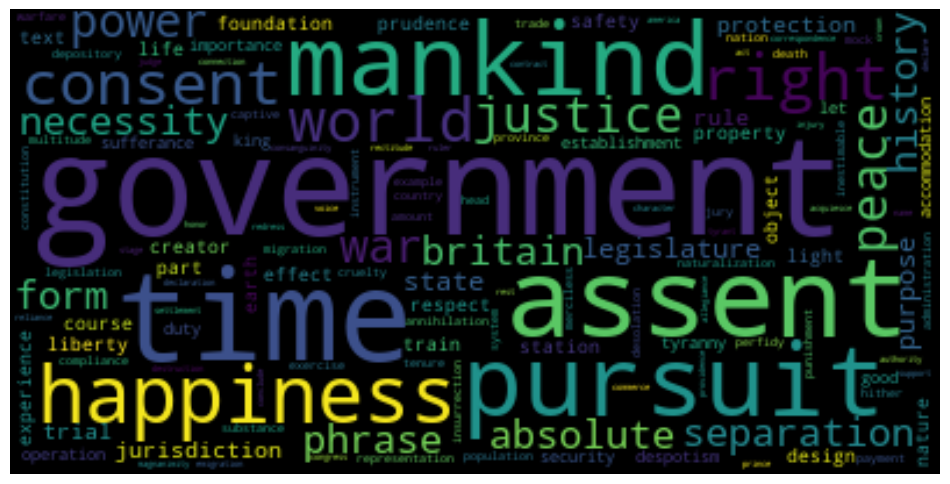

In [33]:
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text + ' ' + word

wordcloud = WordCloud(
    max_font_size = 60,
    relative_scaling = .5
).generate(noun_text)

plt.figure(figsize=(12,10))

# 파이썬이 자랑하는 이미지 출력 장치
plt.imshow(
    wordcloud,
    interpolation='bilinear'
)

plt.axis('off')
plt.show()